In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import time
import signal
from IPython.display import clear_output

In [2]:
# Notes frequencies (Hz)

C = [16.35, 32.7, 65.41, 130.81, 261.63, 523.25, 1046.50, 2093]
CH = [17.32, 34.65, 69.3, 138.59, 277.18, 554.37, 1108.73, 2217.46]
D = [18.35, 36.71, 73.42, 146.83, 293.66, 587.33, 1174.66, 2349.32]
DH = [19.45, 38.89, 77.78, 155.56, 311.13, 622.25, 1244.51, 2489.02]
E = [20.6, 41.2, 82.41, 164.81, 329.63, 659.26, 1318.51, 2637.02]
F = [21.83, 43.65, 87.31, 174.61, 349.23, 698.46, 1396.91, 2793.83]
FH = [23.12, 46.25, 92.5, 185, 369.99, 739.99, 1479.98, 2959.96]
G = [24.5, 49, 98, 196, 392, 783.99, 1567.98, 3135.96]
GH = [25.96, 51.91, 103.83, 207.65, 415.3, 830.61, 1661.22, 3322.44]
A = [27.5, 55, 110, 220, 440, 880, 1760, 3520]
AH = [29.14, 58.37, 116.54, 233.08, 466.16, 932.33, 1864.66, 3739.31]
B = [30.87, 61.74, 123.47, 246.94, 493.88, 987.77, 1975.53, 3951.07]

all_notes = [C, CH, D, DH, E, F, FH, G, GH, A, AH, B]

In [3]:
# Listen with PyAudio

# Parameters
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 2

# Initialize pyaudio
audio = pyaudio.PyAudio()

# Open stream
stream = audio.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording...")

Recording...


In [4]:
print("Ending recording")

Ending recording


In [5]:
# Read audio data
frames = []
for _ in range(int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(np.frombuffer(data, dtype=np.int16))

# Close stream
stream.stop_stream()
stream.close()
audio.terminate()

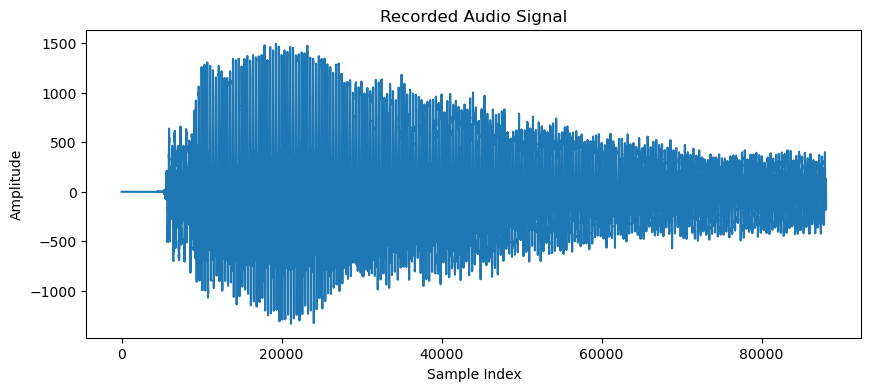

In [6]:
# Plot data
audio_data = np.concatenate(frames) # convert frames to single numpy array
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title('Recorded Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

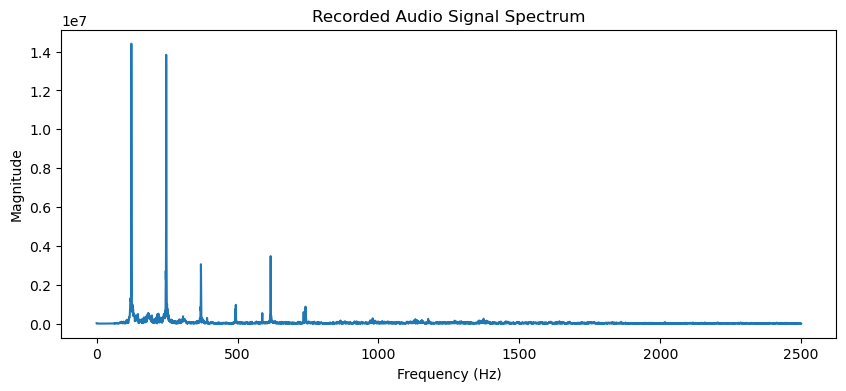

In [7]:
# Perform FFT
n = len(audio_data)
audio_data_fft = np.abs(np.fft.fft(audio_data))
frequencies = np.fft.fftfreq(n, 1/RATE)
audio_fft = audio_data_fft[0:n//2]
freq = frequencies[0:n//2]

# Trim signal
aux = freq <= 2500
f = freq[aux]
x = audio_fft[aux]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(f, x)
plt.title('Recorded Audio Signal Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [8]:
# Identify harmonics
ft = f[x >= 10**7]
print(ft)

# Identify first harmonic
note = np.mean(ft[ft < ft[0]*1.05])
print(note)

[123.18995276 246.88067769]
123.1899527616279


In [9]:
# Identify note closest to first harmonic
ratios = note/all_notes
closeness = np.abs(ratios - 1)
indices = np.where(closeness == np.min(closeness))

if indices[0] == 0:
    print('C', end="")
elif indices[0] == 1:
    print('C#', end="")
elif indices[0] == 2:
    print('D', end="")
elif indices[0] == 3:
    print('D#', end="")
elif indices[0] == 4:
    print('E', end="")
elif indices[0] == 5:
    print('F', end="")
elif indices[0] == 6:
    print('F#', end="")
elif indices[0] == 7:
    print('G', end="")
elif indices[0] == 8:
    print('G#', end="")
elif indices[0] == 9:
    print('A', end="")
elif indices[0] == 10:
    print('A#', end="")
elif indices[0] == 11:
    print('B', end="")


B

In [10]:
# Detect whether note is higher or lower then target
difference = (ratios[indices] - 1) * 100
if difference > 2:
    print(" ↓↓↓")
elif difference > 1.3:
    print(" ↓↓")
elif difference > 0.5:
    print(" ↓")
elif difference < 0.5 and difference > -0.5:
    print("")
elif difference < -2:
    print(" ↑↑↑")
elif difference < -1.3:
    print(" ↑↑")
else:
    print("↑")

Functions with the above functionalities

In [11]:
# Notes frequencies
C = [16.35, 32.7, 65.41, 130.81, 261.63, 523.25, 1046.50, 2093]
CH = [17.32, 34.65, 69.3, 138.59, 277.18, 554.37, 1108.73, 2217.46]
D = [18.35, 36.71, 73.42, 146.83, 293.66, 587.33, 1174.66, 2349.32]
DH = [19.45, 38.89, 77.78, 155.56, 311.13, 622.25, 1244.51, 2489.02]
E = [20.6, 41.2, 82.41, 164.81, 329.63, 659.26, 1318.51, 2637.02]
F = [21.83, 43.65, 87.31, 174.61, 349.23, 698.46, 1396.91, 2793.83]
FH = [23.12, 46.25, 92.5, 185, 369.99, 739.99, 1479.98, 2959.96]
G = [24.5, 49, 98, 196, 392, 783.99, 1567.98, 3135.96]
GH = [25.96, 51.91, 103.83, 207.65, 415.3, 830.61, 1661.22, 3322.44]
A = [27.5, 55, 110, 220, 440, 880, 1760, 3520]
AH = [29.14, 58.37, 116.54, 233.08, 466.16, 932.33, 1864.66, 3739.31]
B = [30.87, 61.74, 123.47, 246.94, 493.88, 987.77, 1975.53, 3951.07]
all_notes = [C, CH, D, DH, E, F, FH, G, GH, A, AH, B]

# Pyaudio parameters
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 0.5

# Listen and return audio data
def listen():
    # Start recording
    stream = audio.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)
    
    # Read audio data
    frames = []
    for _ in range(int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(np.frombuffer(data, dtype=np.int16))
    audio_data = np.concatenate(frames)

    # Close stream
    stream.stop_stream()
    stream.close()

    return audio_data


# Identify note
def identify_note(audio_data):
    # Perform FFT
    n = len(audio_data)
    audio_data_fft = np.abs(np.fft.fft(audio_data))
    frequencies = np.fft.fftfreq(n, 1/RATE)
    audio_fft = audio_data_fft[0:n//2]
    freq = frequencies[0:n//2]

    # Trim signal
    aux = freq <= 2500
    f = freq[aux]
    x = audio_fft[aux]

    # Identify harmonics
    ft = f[x >= 3 * 10**6]

    # If no note detected, return None
    if len(ft) == 0:
        return None

    # Identify first harmonic
    note = np.mean(ft[ft < ft[0]*1.05])
    return note

# Print closest note and whether to tune up or down
def actual_tuner(note):
    # If no note detected
    if note is None:
        return

    # Identify note closest to first harmonic
    ratios = note/all_notes
    closeness = np.abs(ratios - 1)
    indices = np.where(closeness == np.min(closeness))

    # Clear cell output
    clear_output(wait=True)

    # Print note
    if indices[0] == 0:
        print('C', end="")
    elif indices[0] == 1:
        print('C#', end="")
    elif indices[0] == 2:
        print('D', end="")
    elif indices[0] == 3:
        print('D#', end="")
    elif indices[0] == 4:
        print('E', end="")
    elif indices[0] == 5:
        print('F', end="")
    elif indices[0] == 6:
        print('F#', end="")
    elif indices[0] == 7:
        print('G', end="")
    elif indices[0] == 8:
        print('G#', end="")
    elif indices[0] == 9:
        print('A', end="")
    elif indices[0] == 10:
        print('A#', end="")
    elif indices[0] == 11:
        print('B', end="")

    # Detect whether note is higher or lower then target and print it
    difference = (ratios[indices] - 1) * 100
    if difference > 2:
        print(" ↓↓↓")
    elif difference > 1.3:
        print(" ↓↓")
    elif difference > 0.5:
        print(" ↓")
    elif difference < 0.5 and difference > -0.5:
        print("")
    elif difference < -2:
        print(" ↑↑↑")
    elif difference < -1.3:
        print(" ↑↑")
    else:
        print(" ↑")

# Variable to indicate if the loop should continue running
continue_running = True

# Handler for the interrupt signal (Ctrl+C)
def signal_handler(sig, frame):
    global continue_running
    continue_running = False
    print("\nInterrupted by the user.")

# Register the signal handler for SIGINT (Ctrl+C)
signal.signal(signal.SIGINT, signal_handler)

<function _signal.default_int_handler(signalnum, frame, /)>

In [12]:
# Implement function that calls all previous functions and loops until stopped by keyboard
def listen_classify():
    # Get the start time
    start_time = time.time()

    # Initialize pyaudio
    audio = pyaudio.PyAudio()

    try:
        # Loop until 60 seconds have passed or the user interrupts
        while continue_running and (time.time() - start_time < 180):
            audio_data = listen()
            note = identify_note(audio_data)
            actual_tuner(note)
            time.sleep(0.1)

    finally:
        audio.terminate()

In [13]:
listen_classify()

KeyboardInterrupt: 